# Lesson 6: Visualization & Geographic Maps

## Initial Setup

Import libraries and initialize variables to pick up where we left off in the previous lesson.

In [1]:
import pandas
%matplotlib inline

In [2]:
weather = pandas.read_csv('data/weather_YVR.csv')
weather['Date'] = pandas.to_datetime(weather['Date'])
weather['Rain (inches)'] = weather['Rain (mm)'] / 25.4
weather['T_range (C)'] = weather['T_high (C)'] - weather['T_low (C)']

In [3]:
world = pandas.read_csv('data/gapminder_world_data_2018.csv')
world['area'] = world['population'] / world['pop_density']

# Data Visualization Libraries

![viz_libraries](img/viz_libraries.png)

Plus many, many, many more!

# matplotlib & seaborn

- `matplotlib` is a robust, detail-oriented, low level plotting library. 
- `seaborn` provides high level functions on top of `matplotlib`.
  - Create attractive figures with customized themes.
  - Statistical data visualzation - syntax focuses on expressing what is being explored in the underlying data rather than what graphical elements to add to the plot.


![matplotlib_seaborn](img/matplotlib_seaborn.png)

# plotly

- Interactive online plots and dashboards

![plotly](img/plotly.png)

# Plotting with Matplotlib

As we saw earlier, to display `matlotlib`-based plots in a notebook, we need to run the magic command:
```python
%matplotlib inline
```
> If you've already run this command in your notebook, you don't need to run it again.

- To create plots from scratch (rather than through the `plot` method of `pandas` data structures), we need to import the `pyplot` module from `matplotlib`.
- We give it the nickname `plt` so that we don't have to type out the whole name `matplotlib.pyplot` every time we use it.

In [4]:
import matplotlib.pyplot as plt

To focus on the basics of `matplotlib`, we will first create a very simple plot with just a few data points.

In [5]:
x = [1, 2, 3, 4]
y = [1, 2, 4, 3]

We can create a line plot with the function `plt.plot()`:

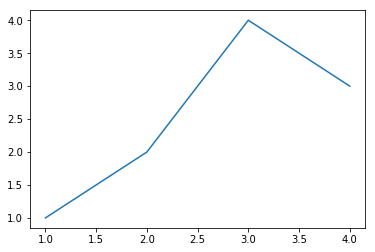

In [6]:
plt.plot(x ,y)

However, if we want to customize our plot, it's better to explicitly create a **figure** and an **axes** object and store these as variables.
> A `matplotlib` axes object refers to what you would often call a subplot and it is named "axes" because it consists of an x-axis and a y-axis by default.

The function `plt.subplots()` returns two outputs:
- The first output is a figure object
- The second output is an axes object (or an array of axes objects for multiple subplots)

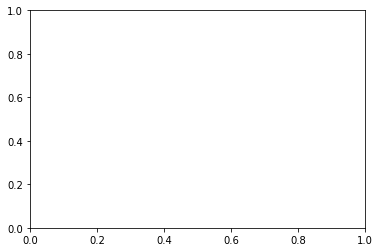

In [7]:
fig, ax = plt.subplots()

Calling `subplots()` returns two objects, the figure and its axes object. Plots can be added to the axes object of the figure using the name we assigned to the returned axes object (`ax` by convention).

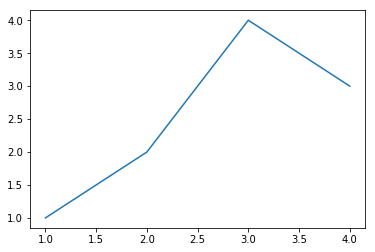

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y)

To create a scatter plot, use `scatter()` instead of `plot()`.

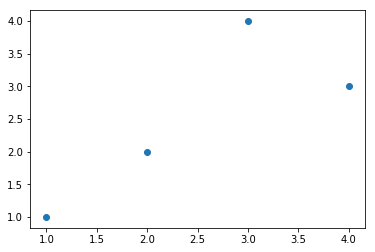

In [9]:
fig, ax = plt.subplots()
ax.scatter(x, y)

Plots can also be combined together in the same axes and the line style and marker color can be changed:

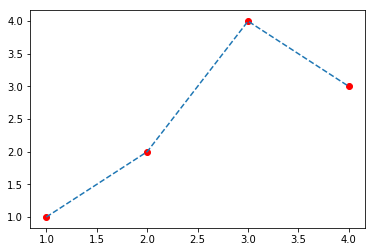

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

You can specify colors using any of the [named colors in this list](https://matplotlib.org/examples/color/named_colors.html), or you can use other specifications such as RGB values or HTML hex strings.

Plot elements can be resized:

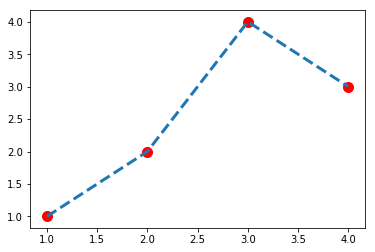

In [11]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red', s=100)
ax.plot(x, y, linestyle='dashed', linewidth=3)

We can change the size of the figure itself with the `figsize` keyword argument to `plt.subplots()`.
- `figsize` is a tuple specifying the width and height in inches (when it is printed or in a PDF)
- To create a figure 7" wide by 6" tall:

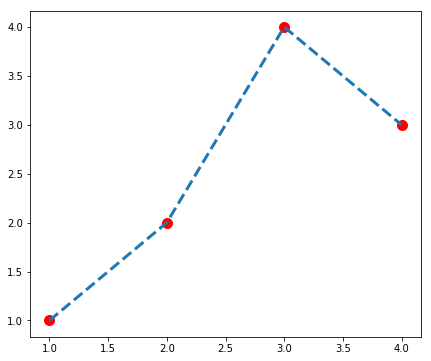

In [12]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(x, y, color='red', s=100)
ax.plot(x, y, linestyle='dashed', linewidth=3)

It is common to modify the plot after creating it, e.g. adding a title or label the axis.

Text(0.5,0,'Measurement X')

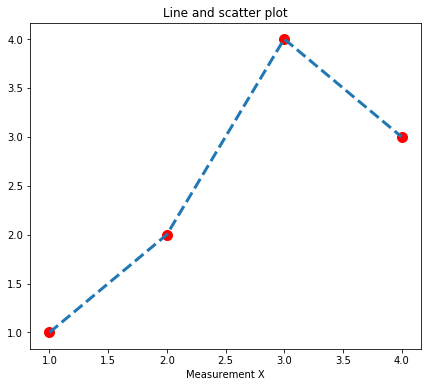

In [13]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(x, y, color='red', s=100)
ax.plot(x, y, linestyle='dashed', linewidth=3)

ax.set_title('Line and scatter plot')
ax.set_xlabel('Measurement X')

# Subplots

The scatter and line plot can easily be separated into two subplots within the same figure.
- We specify the number of rows, followed by the number of columns.

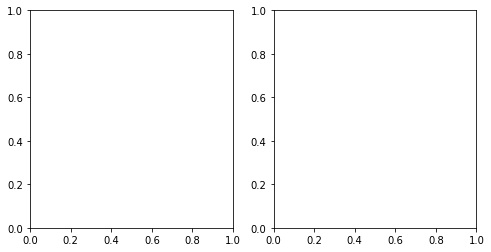

In [14]:
fig, ax_array = plt.subplots(1, 2, figsize=(8, 4))

Since there is more than one subplot, the second output `ax_array` is an array containing two axes objects.

To prevent plot elements, such as the axis ticklabels from overlapping, `tight_layout()` method can be used.

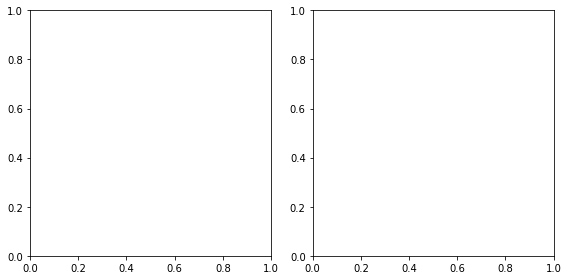

In [15]:
fig, ax_array = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()

Bringing it all together to separate the line and scatter plot:
> We assign the elements of `ax_array` to separate variables `ax1` and `ax2`.

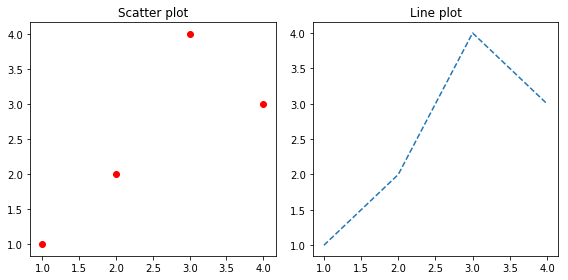

In [16]:
fig, ax_array = plt.subplots(1, 2, figsize=(8, 4))
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.scatter(x, y, color='red')
ax1.set_title('Scatter plot')

ax2.plot(x, y, linestyle='dashed')
ax2.set_title('Line plot')

fig.tight_layout()

# Saving to File

- Figures can be saved by calling the `savefig()` method and specifying the name of file to create.
- The resolution of the figure can be controlled by the `dpi` parameter.

In [17]:
fig.savefig('scatter-and-line.png', dpi=300)

- A PDF file can be saved by changing the extension in the specified file name. 
- Since PDF is a vector file format, there is no need to specify the resolution.

In [18]:
fig.savefig('scatter-and-line.pdf')

# Customizing Pandas Plots

The `plot` method of `pandas` DataFrames and Series returns `matplotlib` axes object(s) that can be used for customization.

For example, returning to the Gapminder world countries dataset:

In [19]:
world.head()

,country,population,region,sub_region,income_group,life_expectancy,gdp_per_capita,children_per_woman,child_mortality,pop_density,area
0,Afghanistan,36400000,Asia,Southern Asia,Low,58.7,1870,4.33,65.90,55.7,6.535009e+05
1,Albania,2930000,Europe,Southern Europe,Upper middle,78.0,12400,1.71,12.90,107.0,2.738318e+04
2,Algeria,42000000,Africa,Northern Africa,Upper middle,77.9,13700,2.64,23.10,17.6,2.386364e+06
3,Angola,30800000,Africa,Sub-Saharan Africa,Lower middle,65.2,5850,5.55,81.60,24.7,1.246964e+06
4,Antigua and Barbuda,103000,Americas,Latin America and the Caribbean,High,77.6,21000,2.03,7.89,234.0,4.401709e+02


Create a scatter plot of life expectancy vs. GDP per capita with `pandas` default settings:

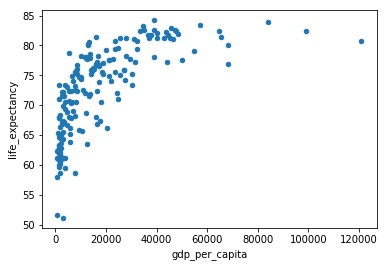

In [20]:
ax = world.plot(kind='scatter', x='gdp_per_capita', y='life_expectancy')

We can customize the labels and set the x-axis to log-scale:

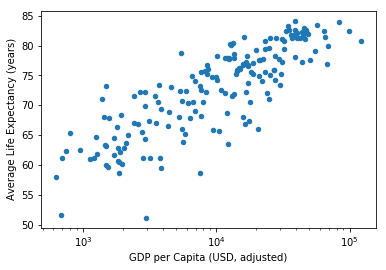

In [21]:
ax = world.plot(kind='scatter', x='gdp_per_capita', y='life_expectancy')
ax.set_xlabel('GDP per Capita (USD, adjusted)')
ax.set_ylabel('Average Life Expectancy (years)')
ax.set_xscale('log')

# Bonus: Tiny Intro to Seaborn

If we create the previous scatter plot with `seaborn` instead of `pandas`, we can easily enrich our plot with additional information, such as coloring each point by region.

First, import the `seaborn` library and give it the nickname `sns`:

In [22]:
import seaborn as sns

Use `sns.scatterplot()` to create the figure and set the `'region'` column of `world` as the hue:

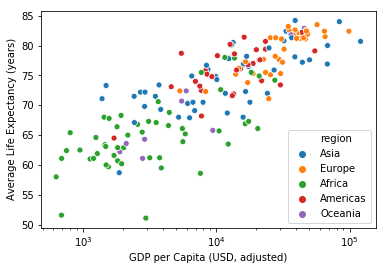

In [23]:
ax = sns.scatterplot(data=world, x='gdp_per_capita', y='life_expectancy', hue='region')
ax.set_xlabel('GDP per Capita (USD, adjusted)')
ax.set_ylabel('Average Life Expectancy (years)')
ax.set_xscale('log')

# Exercise 6.1

**a)** First, create the following variables:
```python
x_data = [0, 1, 2, 3, 4, 5, 6]
y_linear = [0, 2, 4, 6, 8, 10, 12]
y_exp = [0, 1, 4, 9, 16, 25, 36]
```
Plot `y_linear` vs. `x_data` and `y_exp` vs. `x_data` on a figure with the following customizations:
- Figure size 5" wide by 6" tall
- `y_linear` vs. `x_data` as a line plot with line width of 2 and color `'purple'`
- `y_exp` vs. `x_data` as a line plot with line width of 4, line style `'dotted'`, and color `'forestgreen'`
- Figure title `'Linear and Exponential Data'`

**b)** Save the figure in `.png` and `.pdf` formats

### Bonus exercises

**c)** Try out other customizations such as using other colors from the [named color list](https://matplotlib.org/examples/color/named_colors.html), different line styles, assigning x- and y-labels, changing the axis limits with `ax.set_xlim()` and `ax.set_ylim()`, splitting the figure into subplots with one above and one below (instead of side by side), and so on...

# Geographic Maps with Cartopy

- `cartopy` is a library for geospatial data analysis and creating maps.
- Behind the scenes, `cartopy` uses `numpy`, `PROJ.4`, and `shapely` libraries for geospatial data processing, and `matplotlib` for creating figures.
- For examples, check out the [cartopy gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html).

## Installing Cartopy

- `cartopy` does not currently come with the standard Anaconda distribution, so you may need to add it to your Anaconda environment.
- To check if `cartopy` is installed, select "Terminal" from the Launcher in JupyterLab.
- In the Terminal, run the following command:
```
conda list cartopy
```

If `cartopy` is already installed, it will be listed similar to the output below.
```
# packages in environment at C:\Users\jenfl\Anaconda3:
#
# Name                    Version                   Build  Channel
cartopy                   0.16.0           py36hc59b559_0
```

If it's not already installed, run the following command in the Terminal:
```
conda install cartopy
```
- Type `y` when it asks if you want to proceed.

## Importing Cartopy

- To create a map, we need to import `cartopy`'s [coordinate reference systems](https://scitools.org.uk/cartopy/docs/latest/crs/index.html).
- The common convention is to import it as follows:

In [24]:
import cartopy.crs as ccrs

# Projections

When creating a map, we need to decide what projection to use. Some interesting properties you may want in a map are:

- Conformal: Preserves angles locally, implying that locally shapes are not distorted.
- Equal Area: Areas are conserved.
- Compromise: Neither conformal nor equal-area, but a balance intended to reduce overall distortion.
- Equidistant: All distances from one (or two) points are correct. Other equidistant properties are mentioned in the notes.
- Gnomonic: All great circles are straight lines.

See the [Wikipedia list of projections](https://en.wikipedia.org/wiki/List_of_map_projections#Properties)
for more information.

- Cartopy has [several options available](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) for map projections.
- We will start with the very straightforward [Plate Carrée](https://en.wikipedia.org/wiki/Equirectangular_projection)
(also known as Equirectangular or Equidistant Cylindrical).

To create our first very simple map:
- Create a `matplotlib` figure.
- Create axes with the figure's `add_subplot()` method, which allows us to specify the map projection `ccrs.PlateCarree()`.
> The axes object created is a special type called `GeoAxes`, which is a `matplotlib` axes object enhanced with additional methods for working with maps.
- Add a stock image with the `stock_img()` method.

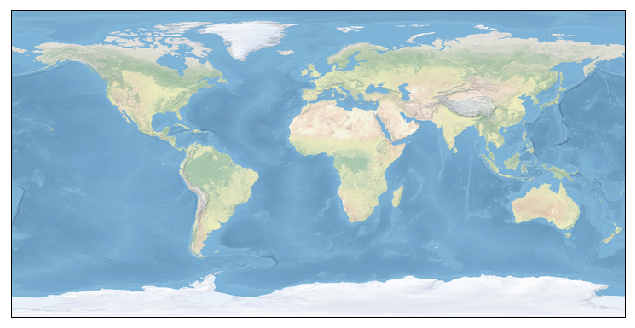

In [25]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()

We can also change the central longitude of our map with the `central_longitude` keyword argument to `ccrs.PlateCarree()`:

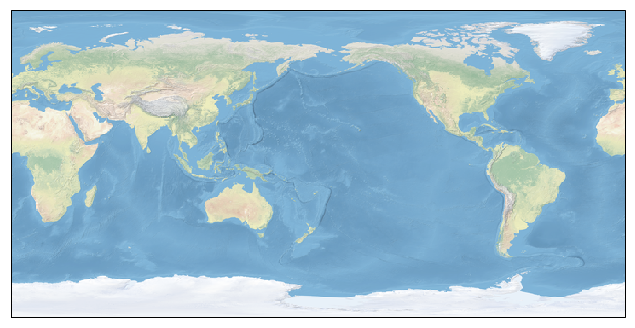

In [26]:
fig = plt.figure(figsize=(11, 8)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.stock_img()

# Adding Features

We can add features such as coastlines, country borders, land, ocean, lakes, rivers using the `cartopy.feature` module, which we import and give the commonly used nickname `cfeature`:

In [27]:
import cartopy.feature as cfeature

Let's add coastlines and country borders with the `add_feature()` method.
- Coastline data is in `cfeature.COASTLINE`.
- Country borders data is in `cfeature.BORDERS`.
- We use the keyword argument `alpha=0.5` to set 50% transparency for these features.

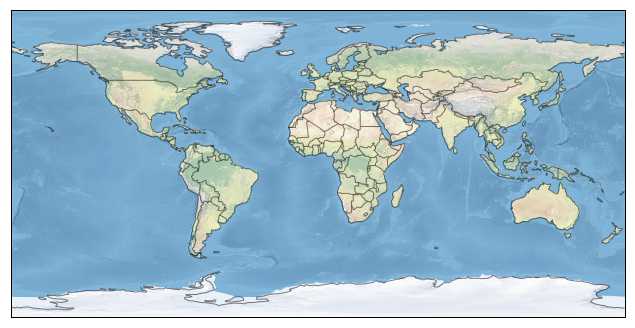

In [28]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.BORDERS, alpha=0.5)

Instead of using the stock image as a background, we can add features to shade the land and ocean regions:

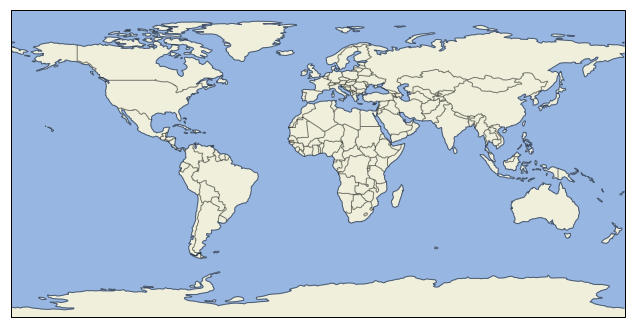

In [29]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.BORDERS, alpha=0.5)

# Adding Data

The file `data/country_capitals.csv` contains the latitude and longitude of capital cities for countries around the world, compiled [on this website](http://techslides.com/list-of-countries-and-capitals).

In [30]:
cities = pandas.read_csv('data/country_capitals.csv')
cities.head()

,Capital City,Latitude,Longitude,Country,Continent
0,Kabul,34.516667,69.183333,Afghanistan,Asia
1,Mariehamn,60.116667,19.900000,Aland Islands,Europe
2,Tirana,41.316667,19.816667,Albania,Europe
3,Algiers,36.750000,3.050000,Algeria,Africa
4,Pago Pago,-14.266667,-170.700000,American Samoa,Australia


- To plot the city locations, we can use the `scatter()` method of the axes object.
- We use the keyword argument `transform=ccrs.PlateCarree()` to tell the `scatter` method that the data we're plotting is in simple latitude and longitude coordinates.
> We'll see shortly why the `transform` keyword argument is important.

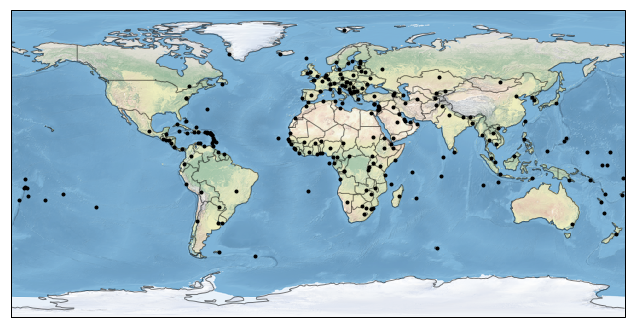

In [31]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.BORDERS, alpha=0.5)
ax.scatter(data=cities, x='Longitude', y='Latitude', marker='.', 
           color='black', transform=ccrs.PlateCarree())

Let's try changing the map projection to Mollweide:

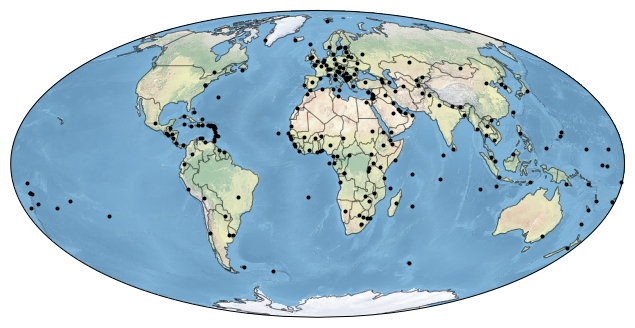

In [32]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax.stock_img()
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.BORDERS, alpha=0.5)
ax.scatter(data=cities, x='Longitude', y='Latitude', marker='.', 
           color='black', transform=ccrs.PlateCarree())

What happens if we omit the `transform` keyword argument to `ax.scatter()`?

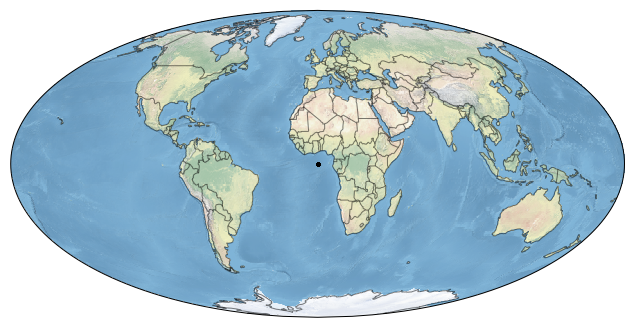

In [33]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax.stock_img()
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.BORDERS, alpha=0.5)
ax.scatter(data=cities, x='Longitude', y='Latitude', marker='.', 
           color='black')

Yikes! Our cities got messed up!
- When we plot data on the map using methods such as `ax.scatter()`, `cartopy` assumes the data is in the same projection as the map unless you specify otherwise with the `transform` keyword argument.

The lines on the `PlateCarree` map below show how the difference between using `PlateCarree` and `Geodetic` for the `transform` keyword argument:

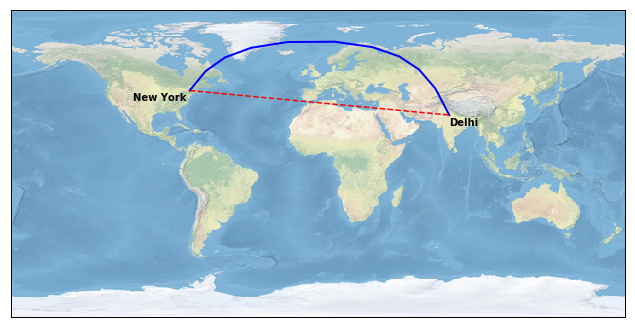

In [34]:
ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2,
         transform=ccrs.Geodetic())

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='red', linestyle='--',
         transform=ccrs.PlateCarree())

ax.text(ny_lon - 2, ny_lat - 6, 'New York',
         horizontalalignment='right', fontweight='bold',
         transform=ccrs.PlateCarree())

ax.text(delhi_lon, delhi_lat - 6, 'Delhi',
         horizontalalignment='left', fontweight='bold',
         transform=ccrs.PlateCarree());

# Exercise 6.2

**a)** Create a map with the following specifications:
- 11" wide by 8" tall
- `ccrs.Orthographic()` projection
- Stock image background
- Any other features or data you'd like to add

**b)** Try out different values of the `central_latitude` and `central_longitude` keyword arguments to `ccrs.Orthographic()` and see how the map changes.

# Where to go from here?

[Additional resources](resources.ipynb)

# Thank You!

---

Go to: [previous lesson](5-indexing-subset.ipynb) | [home](0-introduction.ipynb)